<center><h1 style="color: purple; font-size: 80px;"><b><u> Multiple Linear Regression </u></b></h1></center>

![](https://github.com/avs-abhishek123/Machine-Learning/blob/main/images/sample_images/Multiple%20Linear%20Regression.png?raw=true)

<h2 style ="color:red; font-size: 28px;">
<b>
Table of Contents
</b>
</h2>



- Introduction
- Working with Dataset
- Define X and Y
- Perform One-Hot Encoding
- Change columns using Column Transformer
- Split the dataset into train set and test set
- Train the model
- Predict the test Results
- Evaluate the model
- Plot the Results
- Predicted Values


<hr style ="border: 10px solid purple; border-radius: 5px;">

<h2 style ="color:red; font-size: 28px;">
<b>
Introduction
</b>
</h2>


In this article, we will be dealing with multi-linear regression, and we will take a dataset that contains information about 50 startups. Features include R&D Spend, Administration, Marketing Spend, State, and finally, Profit. Here we have to build the machine learning model to predict the profit of the startups.

Multiple Linear Regression is a machine learning algorithm where we provide multiple independent variables for a single dependent variable. However, linear regression only requires one independent variable as input.




<hr style ="border: 10px solid purple; border-radius: 5px;">

<h2 style ="color:red; font-size: 28px;">
<b>
Working with Dataset
</b>
</h2>


<h3 style="color: blue; font-size: 22px;">
    <b>
        <u>
            Load all necessary libraries 
        </u>
    </b>
</h3>

Import train_test_split to split the dataset into training and testing datasets. And Linear Regression is the model on which we have to work. Import this model from scikit learn library. r2_score is to find the accuracy of the model. Matplotlib and seaborn are used for visualizations. Finally, import warnings and set it to ignore so that it will ignore all the warnings that we will come throughout.



In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Here is the link for the dataset. Download it and import it by passing the path of the dataset file into read_csv().
[Dataset Link](https://www.kaggle.com/datasets/abhishek14398/50startups)

In [2]:
#import dataset
startup_df=pd.read_csv(r'/kaggle/input/50startups/50_Startups_dataset.csv')
startup_df.drop(columns=startup_df.columns[0], axis=1, inplace=True)



In [3]:
print(startup_df.head())

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.30       136897.90        471784.20    New York  192261.93
1  162597.80       151377.69        443898.63  California  191792.16
2  153441.61       101145.65        407934.64     Florida  191050.49
3  144372.51       118671.95        383199.72    New York  182902.09
4  142107.44        91391.87        366168.52     Florida  166188.04


View the shape of the data frame.



In [4]:
shape=startup_df.shape
print("Dataset contains {} rows and {} columns".format(shape[0],shape[1]))

Dataset contains 50 rows and 5 columns


View all the columns in the data frame.

In [5]:
startup_df.columns


Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

Data frame contains R&D Spend, Administration, Marketing Spend, State, and Profit.

View the statistical description of the dataset which includes the total count of each column, mean of all values, standard deviation, minimum, maximum values, and 25th, 50th, 75th per cent values of the dataset.

In [6]:
#Statistical Details of the dataset
startup_df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.715600,121344.739600,211025.197800,112012.739200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.100000,51283.240000,0.100000,14681.500000
25%,39936.470000,103730.975000,129300.232500,90139.002500
50%,73051.180000,122699.895000,212716.340000,107978.290000
75%,101602.900000,144842.280000,299469.185000,139766.077500
max,165349.300000,182645.660000,471784.200000,192261.930000


<hr style ="border: 10px solid purple; border-radius: 5px;">

<h2 style ="color:red; font-size: 28px;">
<b>
Define X and Y
</b>
</h2>


This is like extracting dependent and independent variables.

We have to define x and y for the model. x and y are input and output features of the dataset. So taking x features as input values that are independent, our model will predict the outcome which is y that are dependent.

In [7]:
x=startup_df.iloc[:,:4]
y=startup_df.iloc[:,4]

In [8]:
x

,R&D Spend,Administration,Marketing Spend,State
0,165349.30,136897.90,471784.20,New York
1,162597.80,151377.69,443898.63,California
2,153441.61,101145.65,407934.64,Florida
3,144372.51,118671.95,383199.72,New York
4,142107.44,91391.87,366168.52,Florida
5,131877.00,99814.81,362861.46,New York
6,134615.56,147198.97,127716.92,California
7,130298.23,145530.16,323876.78,Florida
8,120542.62,148719.05,311613.39,New York
9,123334.98,108679.27,304981.72,California


<hr style ="border: 10px solid purple; border-radius: 5px;">

<h2 style ="color:red; font-size: 28px;">
<b>
Perform One-Hot Encoding
</b>
</h2>


We use one-hot encoding when there are categorical values in our dataset. Here for us, there is a state column that is categorical, so we have to use one-hot encoding to convert them.

So, import One-HotEncoder from scikit learn library.

In [9]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse=False)
x=ohe.fit_transform(startup_df[['State']])

In [10]:
x

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0

It will give an array like this. Let us see what are those three categories.

In [11]:
ohe.categories_


[array(['California', 'Florida', 'New York'], dtype=object)]

Here [0., 0., 1.] indicates NewYork, [0., 1., 0.] indicates Florida  and [1., 0., 0.] indicates California.



<hr style ="border: 10px solid purple; border-radius: 5px;">

<h2 style ="color:red; font-size: 28px;">
<b>
Change Columns using Column Transformer
</b>
</h2>


For this import make_column_transformer from scikit learn library and pass the column that we want to transfer.



In [12]:
from sklearn.compose import make_column_transformer

In [13]:
col_trans=make_column_transformer((OneHotEncoder(handle_unknown='ignore'),['State']), remainder='passthrough')

In [14]:
col_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['State'])])

In [15]:
# x=col_trans.fit_transform(x)

<hr style ="border: 10px solid purple; border-radius: 5px;">

<h2 style ="color:red; font-size: 28px;">
<b>
Split the Dataset into Train Set and Test Set
</b>
</h2>



Now, split your dataset into two parts in which 80% of the dataset will go to the training set, and 20% of the dataset will go to the testing set. Actually, you can divide it as per your wish by setting the value into test_size.

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [17]:
#shapes of splitted data
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (40, 3)
X_test: (10, 3)
Y_train: (40,)
Y_test: (10,)


<hr style ="border: 10px solid purple; border-radius: 5px;">

<h2 style ="color:red; font-size: 28px;">
<b>
Train the Model
</b>
</h2>

![](https://github.com/avs-abhishek123/Machine-Learning/blob/main/images/sample_images/train_eval.png?raw=true)

To train the model, we have to import the Linear Regression model, which we have already created at the beginning. Use the fit method, and pass the training sets into it to train the model.



In [18]:
linreg=LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

<hr style ="border: 10px solid purple; border-radius: 5px;">

<h2 style ="color:red; font-size: 28px;">
<b>
Predict the Test Results
</b>
</h2>

Use the predict method to predict the results, then pass the independent variables into it and view the results. It will give the array with all the values in it.

In [19]:
y_pred=linreg.predict(x_test)
y_pred

array([110559.165     , 101383.13625   , 110559.165     , 110559.165     ,
       110559.165     , 117867.14714286, 117867.14714286, 117867.14714286,
       110559.165     , 110559.165     ])

<hr style ="border: 10px solid purple; border-radius: 5px;">

<h2 style ="color:red; font-size: 28px;">
<b>
Evaluate the Model
</b>
</h2>

We have different metrics to find the accuracy score of the model, and here we use r2_score to evaluate our model and find its accuracy.

In [20]:
Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is -22.97


<hr style ="border: 10px solid purple; border-radius: 5px;">

<h2 style ="color:red; font-size: 28px;">
<b>
Plot the Results
</b>
</h2>


We will plot the scatter plot between actual values and predicted values. Use xlabel to label the x-axis and use ylabel to label the y-axis.

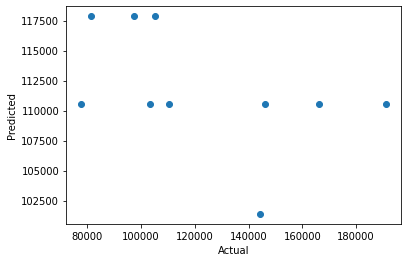

In [21]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

<hr style ="border: 10px solid purple; border-radius: 5px;">

<h2 style ="color:red; font-size: 28px;">
<b>
Regression plot of our model.

</b>
</h2>

A regression plot is useful to understand the linear relationship between two parameters. It creates a regression line in-between those parameters and then plots a scatter plot of those data points.

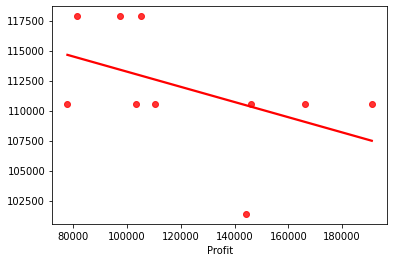

In [22]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');


<hr style ="border: 10px solid purple; border-radius: 5px;">

<h2 style ="color:red; font-size: 28px;">
<b>
Predicted Values
</b>
</h2>

Let us create a new data frame that contains actual values, predicted values, and differences between them so that we will understand how near the model predicts its actual value.

In [23]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})


In [24]:
pred_df


,Actual Value,Predicted Value,Difference
28,103282.48,110559.165000,-7276.685000
11,144259.50,101383.136250,42876.363750
10,146122.05,110559.165000,35562.885000
41,77798.93,110559.165000,-32760.235000
2,191050.49,110559.165000,80491.325000
27,105008.41,117867.147143,-12858.737143
38,81229.16,117867.147143,-36637.987143
31,97483.66,117867.147143,-20383.487143
22,110352.35,110559.165000,-206.815000
4,166188.04,110559.165000,55628.875000


Here we can see the difference between Actual values and predicted values which are not very high. When values are in the range of lakhs, then the difference in thousands is not much.
We have already seen that the accuracy of this model is about 93 percent.

<hr style ="border: 10px solid purple; border-radius: 5px;">

<h2 style ="color:red; font-size: 28px;">
<b>
Conclusion
</b>
</h2>

In this article, we have created a new Linear Regression model, and we learned how to perform One-Hot Encoding and where to perform it. We used a column transformer and then trained the model, predicted the results, evaluated the model using r2_score metrics, and plotted the results.